In [1]:
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.tabular import *

In [6]:
path = Path('/content/drive/My Drive/Kaggle Competitions/Titanic/')
df = pd.read_csv(path/'train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df = df.drop(columns=['Name','Ticket', 'Cabin'])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [8]:
dep_var = 'Survived'
cat_names = ['Sex', 'Embarked','Pclass']
valid_idx = range(int(len(df)*0.8), len(df))
procs = [FillMissing, Categorify, Normalize]

In [9]:
data = TabularDataBunch.from_df(path=path, df=df, dep_var=dep_var, valid_idx=valid_idx, procs=procs, cat_names=cat_names)
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


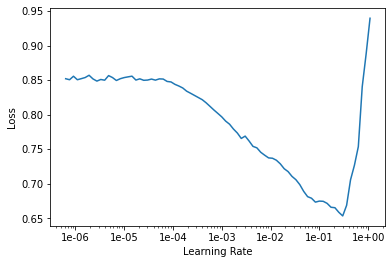

In [11]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.fit_one_cycle(4, 3e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.719974,0.616462,0.782123,00:00
1,0.683819,0.600679,0.787709,00:00
2,0.637739,0.478567,0.793296,00:00
3,0.596135,0.473292,0.810056,00:00


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


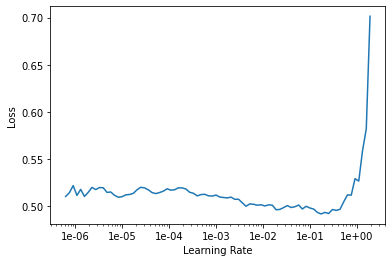

In [14]:
learn.lr_find()
learn.recorder.plot()

In [15]:
learn.unfreeze()
learn.fit_one_cycle(4, max_lr=3e-03)

epoch,train_loss,valid_loss,accuracy,time
0,0.517793,0.445542,0.832402,00:00
1,0.495453,0.387686,0.826816,00:00
2,0.474969,0.397328,0.837989,00:00
3,0.455367,0.398384,0.837989,00:00


In [16]:
df_test = pd.read_csv(path/'test.csv')
df_test = df_test.drop(columns= ['Name','Ticket', 'Cabin'])

In [17]:
def interp_prediction(row):
  _, _, output = learn.predict(row)
  if output[0] > output [1]:
    return 0
  else:
    return 1

In [18]:
df['predict_survived'] = df.apply(interp_prediction, axis=1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,predict_survived
0,1,0,3,male,22.0,1,0,7.2500,S,0
1,2,1,1,female,38.0,1,0,71.2833,C,1
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,1
4,5,0,3,male,35.0,0,0,8.0500,S,0


In [19]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Fare         417 non-null    float64
 7   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 26.2+ KB


In [20]:
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].mean())

In [21]:
df_test['Survived'] = df_test.apply(interp_prediction, axis=1)

In [22]:
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,892,3,male,34.5,0,0,7.8292,Q,0
1,893,3,female,47.0,1,0,7.0000,S,1
2,894,2,male,62.0,0,0,9.6875,Q,0
3,895,3,male,27.0,0,0,8.6625,S,0
4,896,3,female,22.0,1,1,12.2875,S,1


In [23]:
final = df_test[['PassengerId','Survived']]

In [24]:
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [25]:
final.to_csv('submission_1.csv', index=False)